# Practica Final
Modulo 4 - Máster Data Science y Business Analytics
Sergio Hervás Aragón

### Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import missingno as msno
from sklearn.datasets import make_blobs
from sklearn.metrics import roc_curve


## 1. EDA

### 1.1. Carga de datos

In [2]:
file = './caso_final_small_20k_con_mes.csv'
df = pd.read_csv(file, sep=',')

In [3]:
df.head(5)

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,...,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
0,201901,232.121597,10.186000,0.000000,4523.0,1183.0,28.0,232.121597,39.0,54.0,...,21.683399,0,1.767800,0,100.0,2,1,0.0,0.264612,0
1,201911,18280.292969,32.005001,26.450001,13288.0,9194.0,49.0,18280.292969,25.0,152.0,...,166.050007,435,5.555000,0,100.0,1,2,0.0,0.380171,0
2,201906,2141.692810,37.442001,31.400000,13.0,13.0,0.0,2141.692810,47.0,4.0,...,108.850102,0,2.042002,0,100.0,2,2,0.0,0.156041,0
3,202006,3181.986496,20.001000,16.530000,0.0,0.0,0.0,3181.986496,43.0,0.0,...,65.799899,0,3.471001,0,100.0,2,3,0.0,0.228810,1
4,202001,25626.083984,37.005001,26.450001,72783.0,27609.0,151.0,25626.083984,40.0,329.0,...,519.683305,1,5.555000,0,100.0,1,1,0.0,0.210286,1


### 1.2. Descripción y Análisis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MES                                   20000 non-null  int64  
 1   MB_TOTALES                            19741 non-null  float64
 2   FACTURACION_TOTAL_IMPUESTOS           19924 non-null  float64
 3   FACTURACION_CUOTA                     19924 non-null  float64
 4   SEGUNDOS_LLAMADA_RED_PROPIA           19843 non-null  float64
 5   SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  19843 non-null  float64
 6   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  19843 non-null  float64
 7   MB_MENSUALES                          19749 non-null  float64
 8   EDAD                                  19971 non-null  float64
 9   NUM_LLAMADAS_RED_PROPIA               19843 non-null  float64
 10  FACTURACION_TOTAL_SIN_IMPUESTOS       19924 non-null  float64
 11  NUM_LINEAS_PRIN

In [5]:
df.describe()

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,...,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
count,20000.000000,19741.000000,19924.000000,19924.000000,19843.000000,19843.000000,19843.000000,19749.000000,19971.000000,19843.000000,...,19749.000000,20000.000000,19924.000000,20000.00000,19737.000000,20000.000000,20000.000000,19918.000000,18677.000000,20000.000000
mean,201948.470400,12307.320625,40.939452,25.179305,19282.843471,10334.947941,62.941239,12288.026161,43.990937,156.408456,...,361.817034,148.792200,5.657482,0.00785,99.975217,1.432750,1.792750,0.913010,0.257017,0.311050
std,49.255692,20115.499610,30.326117,13.067181,31773.406451,18971.928733,93.528782,20112.795794,14.125926,227.913588,...,543.391221,476.199046,3.552509,0.10435,1.284268,0.756972,1.329882,30.432569,0.073077,0.462935
min,201901.000000,0.000000,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,...,0.000000,0.000000,-1.190000,0.00000,0.000000,1.000000,0.000000,0.000000,0.039562,0.000000
25%,201905.000000,1929.673340,24.999000,15.700000,1777.000000,705.500000,11.000000,1915.529785,33.000000,29.000000,...,64.999998,0.000000,3.297000,0.00000,100.000000,1.000000,1.000000,0.000000,0.199451,0.000000
50%,201911.000000,5931.522949,33.004000,23.969999,8011.000000,3631.000000,36.000000,5898.413086,43.000000,87.000000,...,178.966798,1.000000,5.034000,0.00000,100.000000,1.000000,1.000000,0.000000,0.261877,0.000000
75%,202005.000000,16013.454310,50.124250,26.460000,23009.500000,11846.500000,82.000000,15967.201660,54.000000,199.000000,...,443.583287,2.000000,6.768002,0.00000,100.000000,2.000000,2.000000,0.000000,0.296955,1.000000
max,202011.000000,853613.593750,1246.438000,133.890000,584239.000000,422724.000000,6220.000000,853613.593750,98.000000,12497.000000,...,12316.250395,4056.000000,93.483509,4.00000,100.000000,8.000000,18.000000,2089.316758,0.380171,1.000000


<Axes: >

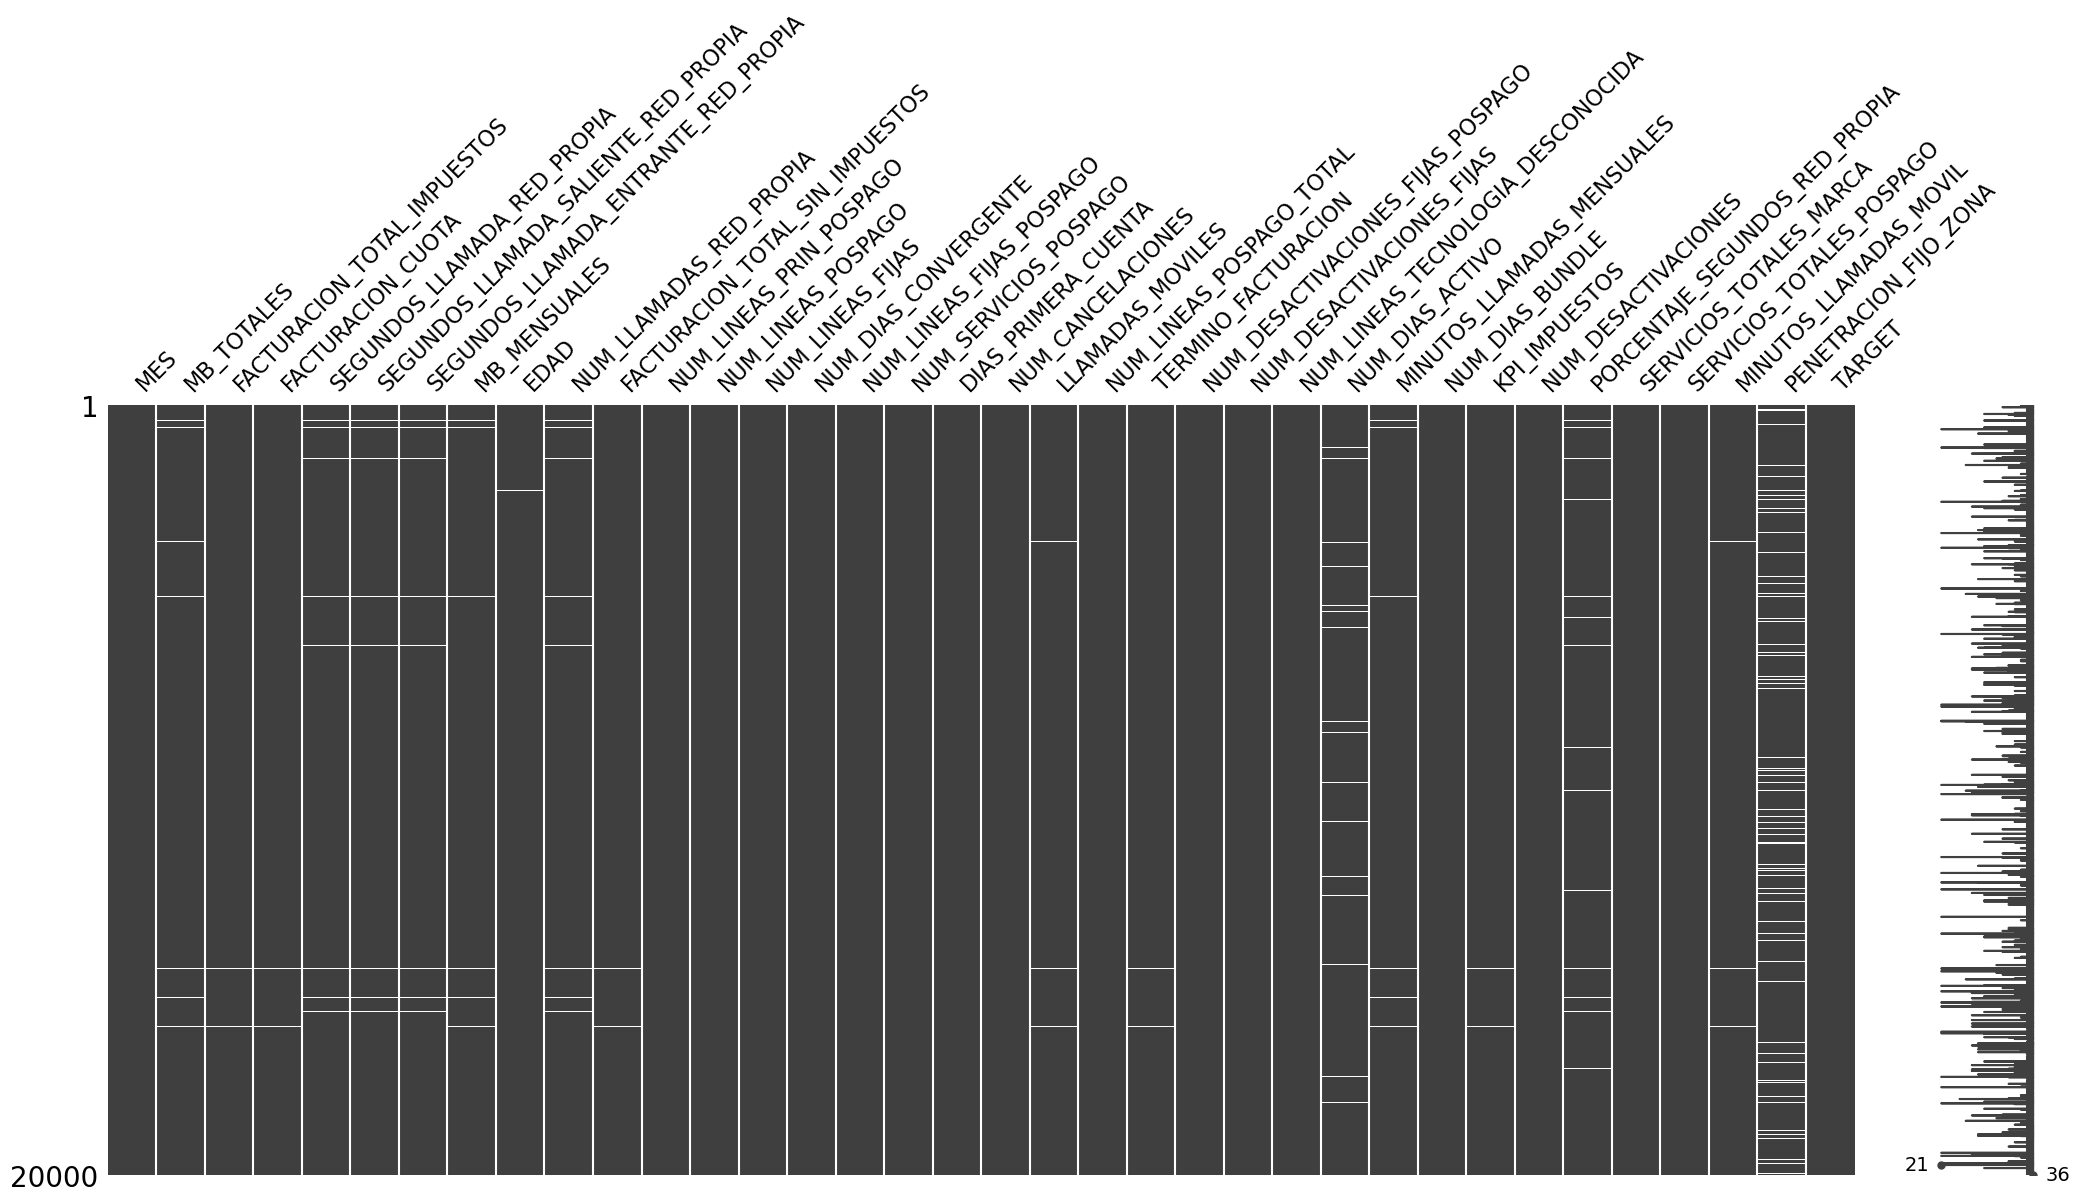

In [6]:
msno.matrix(df)

### 1.3. Distribucion de la variable objetivo

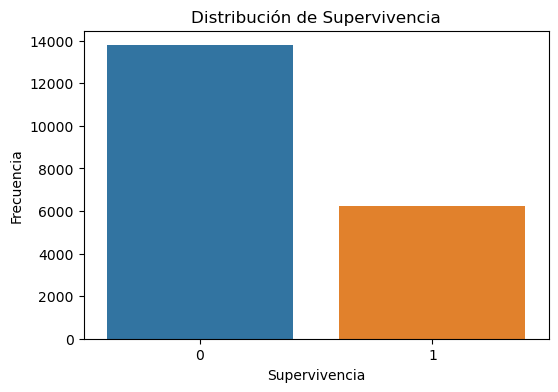

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='TARGET')
plt.title('Distribución de Supervivencia')
plt.xlabel('Supervivencia')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

### 1.4. Tratamiento de nulos mediante imputación

<Axes: >

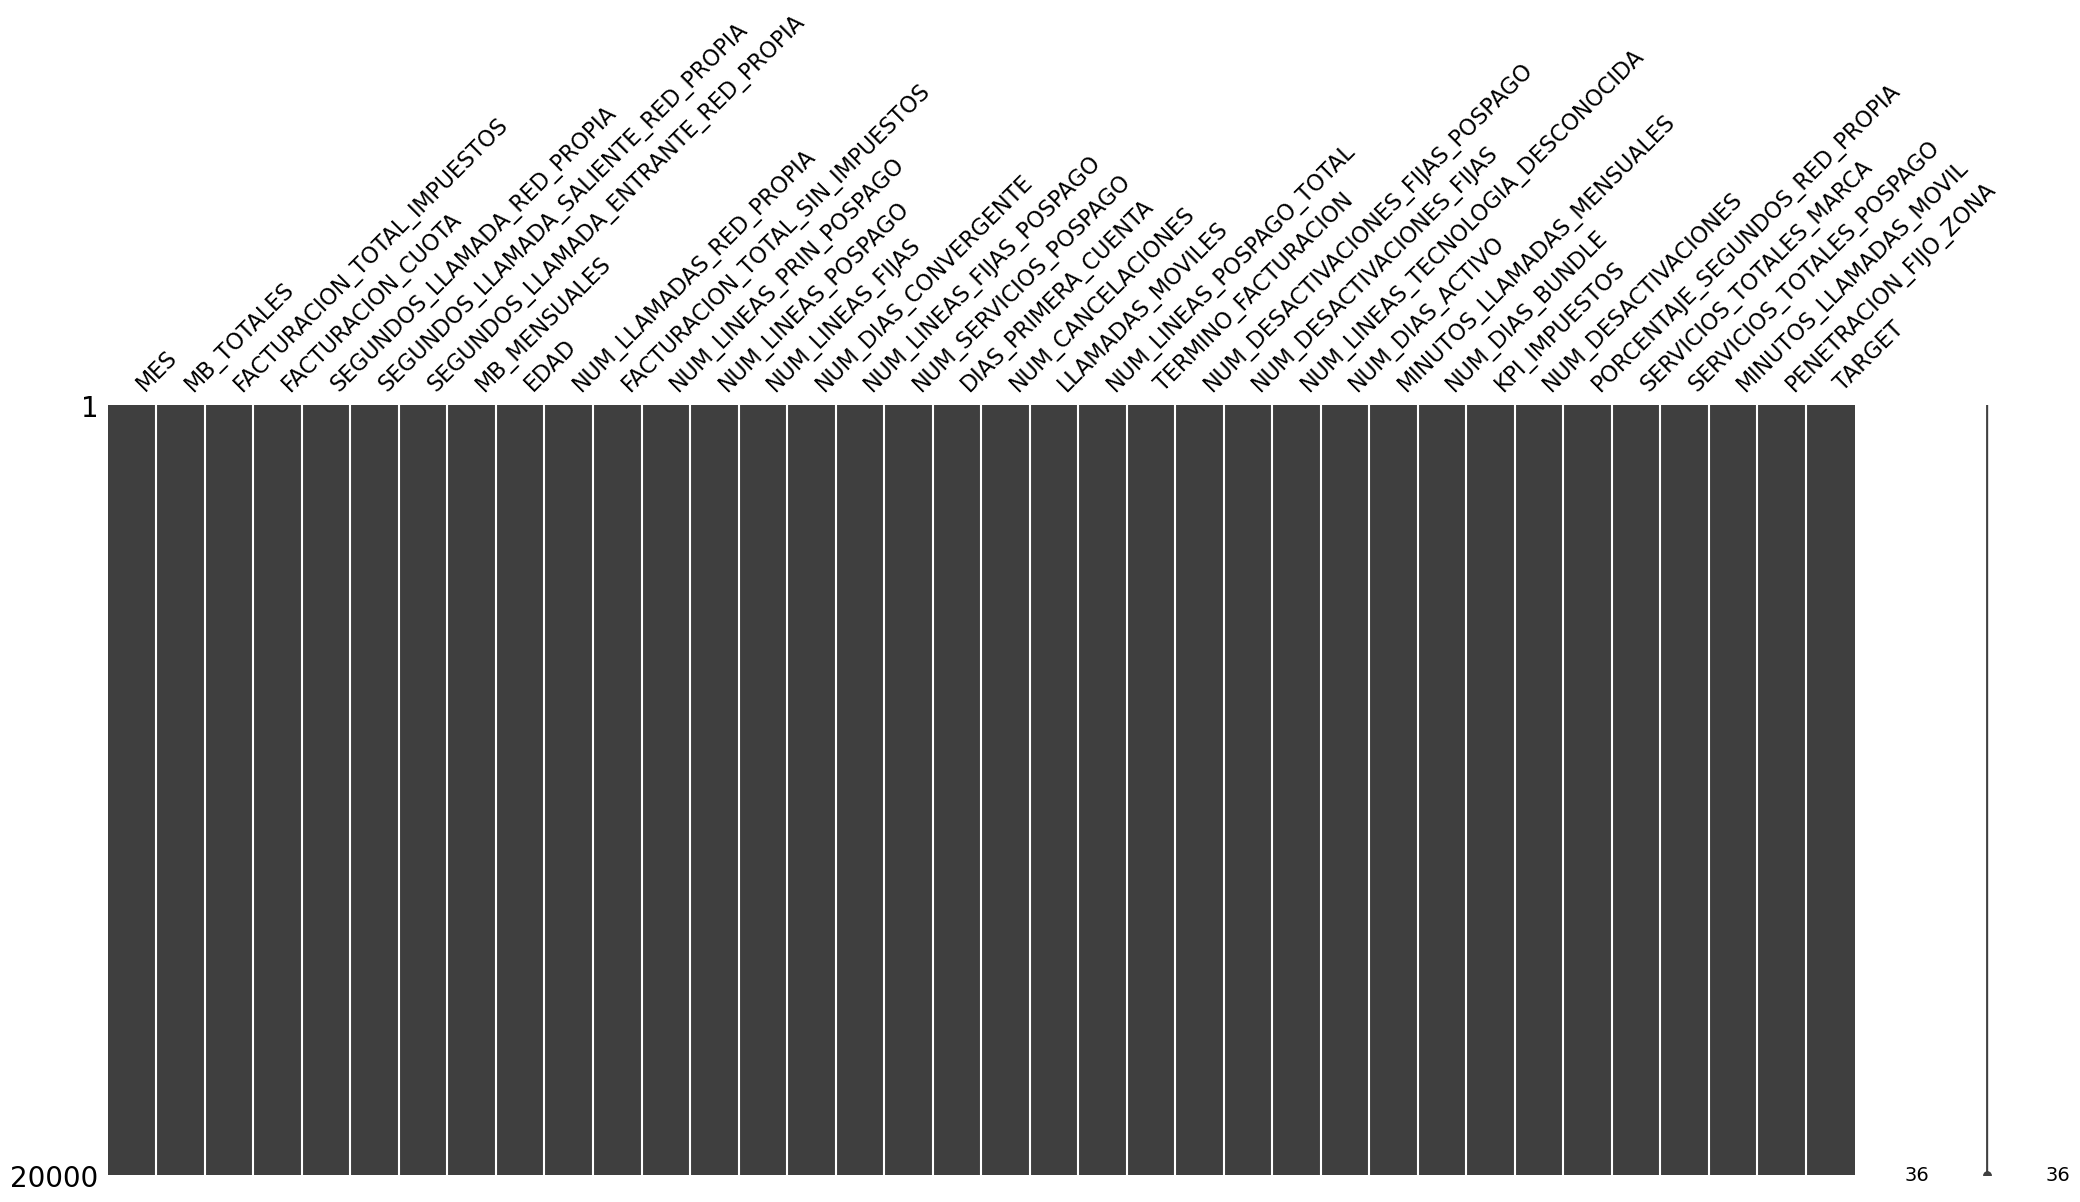

In [8]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
msno.matrix(df)

### 1.4. Outliers

In [ ]:
clf = LocalOutlierFactor(n_neighbors=8, contamination='auto')
y_pred = clf.fit_predict(df)
n_outliers = sum(y_pred==-1)
n_total = len(y_pred)
X_scores = clf.negative_outlier_factor_
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
print(u'El número de outliers detectados es de {} de un total de {}: {}% de outliers'.format(n_outliers, n_total,(n_outliers/n_total)*100))

### 1.4.1. Eliminación de Outliers

In [ ]:
outlier_indices = df[df['outlier'] == -1].index
X_cleaned = X.drop(index=outlier_indices).reset_index(drop=True)
y_cleaned = y.drop(index=outlier_indices).reset_index(drop=True)

Referencias

 - [LocalOutlierFactor](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection)

### 1.5. Análisis de correlación

In [ ]:
matriz_correlaciones = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(matriz_correlaciones, annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Observaciones:

Interpretación de colores: 
 - MB_TOTALES se mide en meses (correlación 1 respecto MB_MENSUALES)
 - Los usuarios que se crean recientemente una cuenta suelen estar muy activos
 - Cuantos más errores en el servicio(NUM_DIAS_BUNDLE), menos actividad (NUM_DIAS_ACTIVO)
 - [...]

Referencias:

 - Documentación vista en clase (Regresion_PrecioDiamantes.ipynb)

 - [Interpretación de correlación](https://www.cimec.es/coeficiente-correlacion-pearson/#:~:text=Un%20valor%20mayor%20que%200,una%20relaci%C3%B3n%20lineal%20positiva%20perfecta.)
 

## 2. Preparación de los datos para el modelado

### 2.1. Selección de variables de entrenamiento.

In [ ]:
x = df.drop(['TARGET', 'MES'], axis=1)
y = df['TARGET']

### 2.2. Estandarización

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_estandarizado = pd.DataFrame(x_scaled, columns=x.columns)
x_estandarizado

### 2.3. Division del dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_estandarizado, y, test_size=0.2, random_state=0)

print(u'Dimensiones en train \n-x:{}\n-y:{}'.format(x_train.shape, y_train.shape))
print(u'Dimensiones en test \n-x:{}\n-y:{}'.format(x_test.shape, y_test.shape))

## 3. Comparación del rendimiento de varios modelos

### 3.1. Regresión logística

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_test_pred_lr = lr.predict(x_test)
y_test_prob_lr = lr.predict_proba(x_test)

In [ ]:
fpr, tpr, thrs = roc_curve(y_test, y_test_prob_lr[:, 1])
plt.figure(figsize=(12,12))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

In [ ]:
auc = roc_auc_score(y_test, y_test_prob_lr[:, 1])
print("- Precision:", round(precision_score(y_test, y_test_pred_lr),2))
print("- Recall:", recall_score(y_test, y_test_pred_lr))
print("- Fscore:", round(f1_score(y_test, y_test_pred_lr),2))
print("- AUC:", round(auc,2))


### 3.2. Modelo ensamblado

[Bagging](http://eio.usc.es/pub/mte/descargas/ProyectosFinMaster/Proyecto_1686.pdf)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_test_pred_rfc = rfc.predict(x_test)
y_test_prob_rfc = rfc.predict_proba(x_test)

In [ ]:
fpr, tpr, thrs = roc_curve(y_test, y_test_prob_rfc[:, 1])
plt.figure(figsize=(12,12))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

In [ ]:
auc = roc_auc_score(y_test, y_test_prob_rfc[:, 1])
print("- Precision:", round(precision_score(y_test, y_test_pred_rfc),2))
print("- Recall:", recall_score(y_test, y_test_pred_rfc))
print("- Fscore:", round(f1_score(y_test, y_test_pred_rfc),2))
print("- AUC:", round(auc,2))


### 3.3. Red neuronal (MLP)

In [ ]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
y_test_pred_mlp = mlp.predict(x_test)
y_test_prob_mlp = mlp.predict_proba(x_test)

In [ ]:
fpr, tpr, thrs = roc_curve(y_test, y_test_prob_mlp[:, 1])
plt.figure(figsize=(12,12))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

In [ ]:
auc = roc_auc_score(y_test, y_test_prob_mlp[:, 1])
print("- Precision:", round(precision_score(y_test, y_test_pred_mlp),2))
print("- Recall:", recall_score(y_test, y_test_pred_mlp))
print("- Fscore:", round(f1_score(y_test, y_test_pred_mlp),2))
print("- AUC:", round(auc,2))

## 4. Segmentación de clientes

In [ ]:
km = KMeans(n_clusters=2, random_state=0)
km = km.fit_predict(x_estandarizado)
km

In [ ]:
rfc_cluster = LogisticRegression()
rfc_cluster.fit

[KMeans clustering](https://www.kaggle.com/code/micheldc55/introduccion-al-clustering-con-python-y-sklearn)

[El algoritmo k-means](https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans)

## 5. Tratamiento y análisis de la columna Mes.

In [ ]:
# Calculamos los cuantiles y el IQR
Q1 = df['MES'].quantile(0.25)
Q3 = df['MES'].quantile(0.75)
IQR = Q3 - Q1

# Calculamos los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificamos outliers por encima y por debajo de los límites
outliers_above = df['MES'][df['MES'] > upper_bound]
outliers_below = df['MES'][df['MES'] < lower_bound]

print("Número de outliers por encima:", outliers_above.shape[0])
print("Número de outliers por debajo:", outliers_below.shape[0])

# Boxplot vertical
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['MES'], color='skyblue', orient='v')
plt.ylabel('Precio')
plt.title('Boxplot Y')
plt.show()

df['MES'] = pd.to_datetime(df['MES'], format='%Y%m')

df['MES'].info()

df['MES'].describe()

- [pandas.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

- [Float Python](https://ellibrodepython.com/float-python)

 - Documentación vista en clase (Regresion_PrecioDiamantes.ipynb)